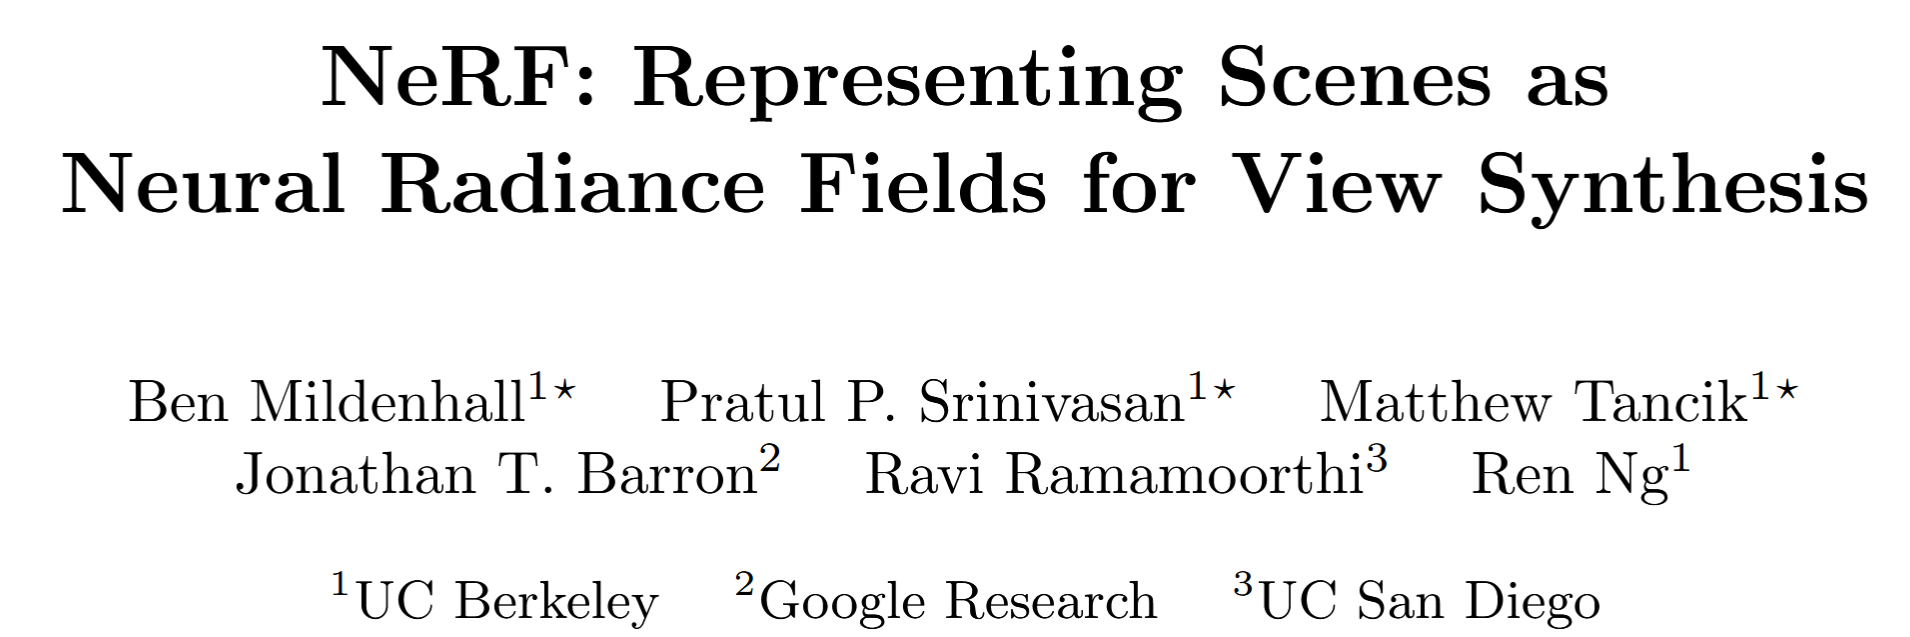
code: 

# NeRF: Representing Scenes as Neural Radiance Fields for View Synthesis  
**Ben Mildenhall, Pratul P. Srinivasan, Matthew Tancik, Jonathan T. Barron, Ravi Ramamoorthi, Ren Ng**  
UC Berkeley, Google Research, UC San Diego  
ECCV 2020

---

## 1. Background

Novel view synthesis — generating new images of a 3D scene from a few input views — is a classic problem in computer vision and graphics.

Traditional methods rely on:
- Explicit 3D geometry such as point clouds, voxel grids, or meshes,
- Or volumetric rendering with dense sampling,
- Or multi-view stereo techniques that struggle in real-world scenes.

Recent deep learning methods attempt to learn scene representations using neural networks, such as:
- Occupancy Networks [27] and Signed Distance Functions [32], which represent geometry implicitly,
- DeepVoxels [41] and Local Light Field Fusion (LLFF) [28], which use voxel-based or image-based rendering techniques.

However, these approaches either:
- Require access to ground-truth 3D geometry,
- Or produce blurry, oversmoothed renderings due to limited resolution.

---

## 2. The Core Idea

The key insight of NeRF is to represent a scene as a continuous volumetric field, using a fully-connected neural network (an MLP).  
It maps 5D coordinates — a 3D position and 2D viewing direction — to both a color and a density:

- Input: a 5D coordinate $(x, y, z, \theta, \phi)$ (or $(x, d)$ with $d$ as a unit 3D direction vector),
- Output: a color value $c = (r, g, b)$ and a volume density $\sigma$.

To render a pixel, NeRF traces a ray from the camera, samples multiple 3D points along the ray, and accumulates their contributions using volume rendering:

$$
C(r) = \int_{t_n}^{t_f} T(t)\,\sigma(r(t))\,c(r(t), d)\,dt
$$

Where $T(t)$ is the accumulated transmittance from the start of the ray to time $t$:

$$
T(t) = \exp\left( -\int_{t_n}^t \sigma(r(s))\,ds \right)
$$

This rendering process is differentiable, which allows the network parameters $\Theta$ to be optimized from 2D image supervision via gradient descent.

To improve the representation’s expressivity and efficiency, NeRF introduces:
- **Positional encoding**: projects input coordinates to a higher frequency space for better detail,
- **Hierarchical sampling**: first uses a coarse model to identify important regions, then samples more densely for fine rendering.

---

## 3. Contributions

This paper introduces:
- A novel **neural volumetric scene representation** that maps 5D inputs to density and radiance using a simple MLP.
- A **differentiable rendering process** that optimizes this representation using only RGB images and camera poses.
- A **positional encoding strategy** to enable modeling of high-frequency scene details.
- A **hierarchical volume sampling technique** that reduces computational cost and improves image quality.

---

## References

[27] Mescheder et al. Occupancy Networks. CVPR 2019.  
[28] Mildenhall et al. Local Light Field Fusion. SIGGRAPH 2019.  
[32] Park et al. DeepSDF. CVPR 2019.  
[41] Sitzmann et al. DeepVoxels. CVPR 2019.  
[42] Sitzmann et al. Scene Representation Networks. NeurIPS 2019.

